In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data

In [3]:
csv_path = "https://raw.githubusercontent.com/nogibjj/int6_individual1/refs/heads/main/data/spotify.csv"

In [4]:
df = pd.read_csv(csv_path)

In [5]:
print(df.head())
print(df.columns)
print(df.shape)

   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   


## Preprocess

In [6]:
df["duration_s"] = df["duration_ms"] / 1000
# Drop the original 'duration_ms' column
df = df.drop("duration_ms", axis=1)

## Summary Stats

In [7]:
numerical_columns = [
    "popularity",
    "duration_s",
    "explicit",
    "danceability",
    "energy",
    "key",
    "loudness",
    "mode",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
    "time_signature",
]

# Initialize dict to store stats
stats_dict = {"column": [], "mean": [], "median": [], "std_dev": []}

# Calculate stats for each column
for col in numerical_columns:
    mean_value = round(df[col].mean(), 2)
    median_value = round(df[col].median(), 2)
    std_dev_value = round(df[col].std(), 2)

    # Store results to dict
    stats_dict["column"].append(col)
    stats_dict["mean"].append(mean_value)
    stats_dict["median"].append(median_value)
    stats_dict["std_dev"].append(std_dev_value)

# Convert dict to pandas DataFrame
stats_df = pd.DataFrame(stats_dict)
stats_df

,column,mean,median,std_dev
0,popularity,33.24,35.00,22.31
1,duration_s,228.03,212.91,107.30
2,explicit,0.09,0.00,0.28
3,danceability,0.57,0.58,0.17
4,energy,0.64,0.68,0.25
5,key,5.31,5.00,3.56
6,loudness,-8.26,-7.00,5.03
7,mode,0.64,1.00,0.48
8,speechiness,0.08,0.05,0.11
9,acousticness,0.31,0.17,0.33


## EDA

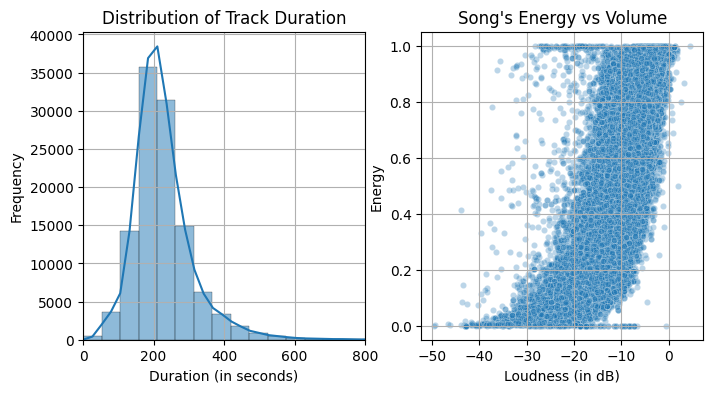

In [8]:
plt.figure(figsize=(8, 4))

# First subplot: histogram of duration
plt.subplot(1, 2, 1)
sns.histplot(df["duration_s"], bins=100, kde=True)
plt.title("Distribution of Track Duration")
plt.xlabel("Duration (in seconds)")
plt.xlim(0, 800)
plt.ylabel("Frequency")
plt.grid(True)

# Second subplot: scatterplot of loudness vs energy
plt.subplot(1, 2, 2)
sns.scatterplot(x="loudness", y="energy", data=df, s=20, alpha=0.3)
plt.title("Song's Energy vs Volume")
plt.xlabel("Loudness (in dB)")
plt.ylabel("Energy")
plt.grid(True)

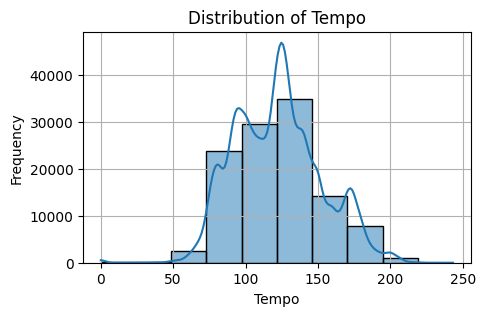

In [9]:
plt.figure(figsize=(5, 3))
sns.histplot(df["tempo"], bins=10, kde=True, edgecolor="black")
plt.title("Distribution of Tempo")
plt.xlabel("Tempo")
plt.ylabel("Frequency")
plt.grid(True)

In [10]:
top_tracks = (
    df.groupby(["track_name", "artists"])["popularity"]
    .mean()
    .sort_values(ascending=False)
    .head(20)
    .reset_index()
)
top_tracks

,track_name,artists,popularity
0,Unholy (feat. Kim Petras),Sam Smith;Kim Petras,100.0
1,"Quevedo: Bzrp Music Sessions, Vol. 52",Bizarrap;Quevedo,99.0
2,La Bachata,Manuel Turizo,98.0
3,Tití Me Preguntó,Bad Bunny,97.0
4,Me Porto Bonito,Bad Bunny;Chencho Corleone,97.0
5,Under The Influence,Chris Brown,96.0
6,Efecto,Bad Bunny,95.5
7,Ojitos Lindos,Bad Bunny;Bomba Estéreo,94.5
8,Glimpse of Us,Joji,94.0
9,Moscow Mule,Bad Bunny,94.0


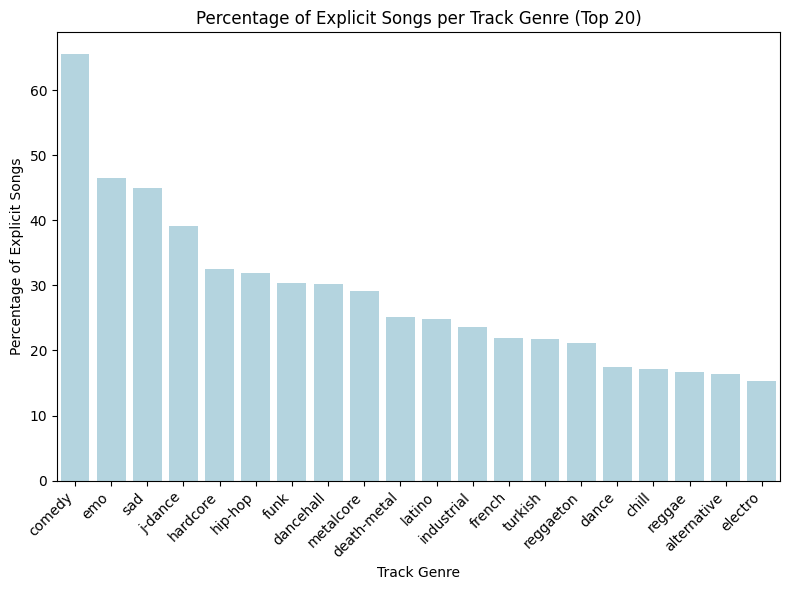

In [14]:
# Calculate the percentage of explicit songs for each track genre
explicit_by_genre = df.groupby("track_genre")["explicit"].mean() * 100

# Get the top 10 track genres
top_10_genres = explicit_by_genre.nlargest(20)

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=top_10_genres.index, y=top_10_genres.values, color="lightblue")
plt.xlabel("Track Genre")
plt.ylabel("Percentage of Explicit Songs")
plt.title("Percentage of Explicit Songs per Track Genre (Top 20)")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()